<a href="https://colab.research.google.com/github/A-Arhami/LR-with-PyGad-optimizer/blob/main/GAPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pygad


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.2 MB/s 


In [ ]:
import pandas as pd
import math
import numpy as np
import pygad


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GApredictions.csv")#.drop(columns=["Unnamed: 0","Time","date"])


In [ ]:
raw

,Time,Close(true lable),prediction 1,prediction 2,prediction
0,12/31/2006,1.31940,1.322531,1.322005,1.124685
1,1/1/2007,1.32343,1.348465,1.321670,1.124930
2,1/2/2007,1.32825,1.330020,1.324405,1.124902
3,1/3/2007,1.31733,1.309952,1.320277,1.124295
4,1/4/2007,1.30683,1.293590,1.314075,1.124027
...,...,...,...,...,...
4315,4/27/2022,1.05295,1.061222,1.181256,NaN
4316,4/28/2022,1.05118,1.067852,1.184440,NaN
4317,4/29/2022,1.05409,1.046568,1.184072,NaN
4318,5/1/2022,1.05180,1.059561,1.181723,NaN


In [ ]:
Raw=raw.dropna()
Raw

,Time,Close(true lable),prediction 1,prediction 2,prediction
0,12/31/2006,1.31940,1.322531,1.322005,1.124685
1,1/1/2007,1.32343,1.348465,1.321670,1.124930
2,1/2/2007,1.32825,1.330020,1.324405,1.124902
3,1/3/2007,1.31733,1.309952,1.320277,1.124295
4,1/4/2007,1.30683,1.293590,1.314075,1.124027
...,...,...,...,...,...
4287,3/25/2022,1.09805,1.137305,1.183453,1.111409
4288,3/27/2022,1.09545,1.117743,1.183496,1.111419
4289,3/28/2022,1.09877,1.105228,1.183872,1.111449
4290,3/29/2022,1.11154,1.087242,1.179332,1.111494


In [ ]:
from sklearn.model_selection import train_test_split

X=Raw.iloc[:,2:4]
Y=Raw.iloc[:,1]
ntest=len (Raw)//5
TrainX=Raw.iloc[:-ntest,2:4]
TrainY=Raw.iloc[:-ntest,1]
TestX=Raw.iloc[-ntest:,2:4]
TestY=Raw.iloc[-ntest:,1]
TrainX, TestX, TrainY, TestY = train_test_split(X, Y, test_size=0.2, random_state=41)

print ("Number of Train data: ",len(TrainX))
print ("Number of Test data: ", len(TestX))

Number of Train data:  3433
Number of Test data:  859


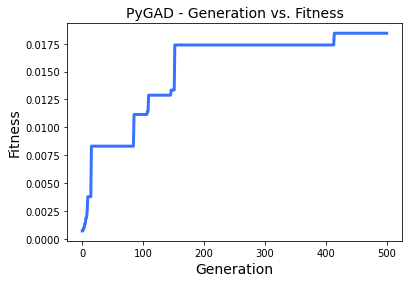

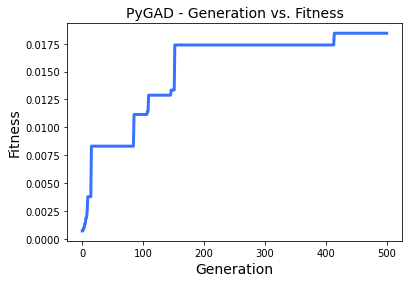

In [ ]:
def Predict(solution, data):
  prediction=np.zeros(len(data))
  for i in range(len(data)):
    prediction[i]=np.sum(solution*data.iloc[i,:])

  return prediction

def fitness_func(solution, solution_idx):
    output = Predict(solution, TrainX)
    fitness = 1.0 /  np.sum(np.abs(output -TrainY)) + 0.000001
    
    return fitness

ga_instance = pygad.GA(num_generations=500,
                       sol_per_pop=10,
                       num_genes=3,
                       num_parents_mating=2,
                       fitness_func=fitness_func,
                       mutation_type="random",
                       mutation_probability=0.6)

ga_instance.run()

ga_instance.plot_fitness()

In [ ]:
from sklearn import metrics

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print('-----------------Train--------------------')
Y_pred = Predict(solution, TrainX)
Y_test=TrainY
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('R2 Score:', metrics.r2_score(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


print('-----------------Test--------------------')
Y_pred = Predict(solution, TestX)
Y_test=TestY
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('R2 Score:', metrics.r2_score(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


Parameters of the best solution : [ 1.06002331 -0.1321987   0.08240581]
Fitness value of the best solution = 0.01843978768055746
-----------------Train--------------------
Mean Absolute Error: 0.015795842219198997
R2 Score: 0.9774250887606286
Root Mean Squared Error: 0.01969567745726305
-----------------Test--------------------
Mean Absolute Error: 0.01641573937305972
R2 Score: 0.975629079843299
Root Mean Squared Error: 0.020454583547485496


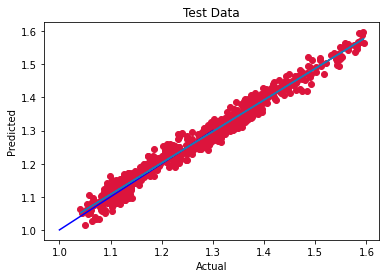

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

y_predicted = Predict(solution, TestX)
y_test=TestY
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted,c='crimson')
plt.plot([1, 1.3], [1, 1.3], 'b-')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test, y_predicted = y_test.values.reshape(-1,1), y_predicted.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_predicted).predict(y_test))
#plt.annotate("r-squared = {:.3f}".format(metrics.r2_score(y_test, y_predicted)), (0, 1))
plt.title("Test Data")

plt.show()

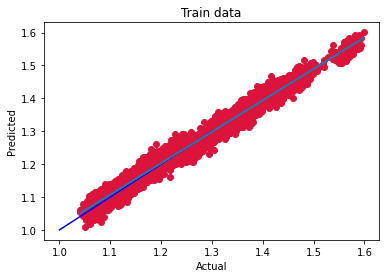

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

y_predicted = Predict(solution, TrainX)
y_test=TrainY
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted,c='crimson')
plt.plot([1, 1.3], [1, 1.3], 'b-')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test, y_predicted = y_test.values.reshape(-1,1), y_predicted.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_predicted).predict(y_test))
#plt.annotate("r-squared = {:.3f}".format(metrics.r2_score(y_test, y_predicted)), (0, 1))
plt.title("Train data")

plt.show()

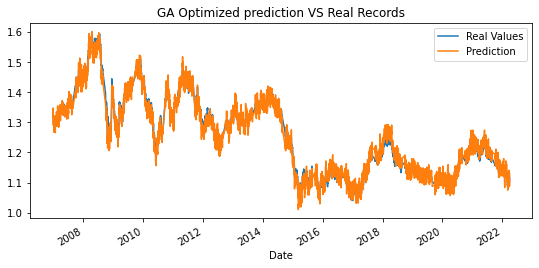

In [ ]:
#DateFrame prediction plot 

import matplotlib.pyplot as plt

Datai=Raw.copy()

Datai["GAprediction"] = Predict(solution, X)
Datai.to_excel("/content/drive/MyDrive/Colab Notebooks/GApredictions.xlsx")

Datai['Date'] = pd.to_datetime(Datai['Time'] )
Datai=Datai.set_index('Date')
#Datai = Datai.asfreq('AS')

fig, ax = plt.subplots(figsize=(9, 4))
Datai.iloc[:,1].plot(ax=ax, label='Real Values')
Datai["GAprediction"].plot(ax=ax, label='Prediction')
plt.title("GA Optimized prediction VS Real Records")

ax.legend();